<a href="https://www.kaggle.com/code/adebayoolalekan/housepricepred-randomforest?scriptVersionId=137055021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


In [2]:
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

In [6]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
enc = OrdinalEncoder()
df['mainroad'] = enc.fit_transform(df[['mainroad']])
df['guestroom'] = enc.fit_transform(df[['guestroom']])
df['basement'] = enc.fit_transform(df[['basement']])
df['hotwaterheating'] = enc.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = enc.fit_transform(df[['airconditioning']])
df['prefarea'] = enc.fit_transform(df[['prefarea']])

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


In [11]:
rank=['unfurnished','semi-furnished','furnished']
oe = OrdinalEncoder(categories=[rank])
df['furnishingstatus']=oe.fit_transform(df[['furnishingstatus']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

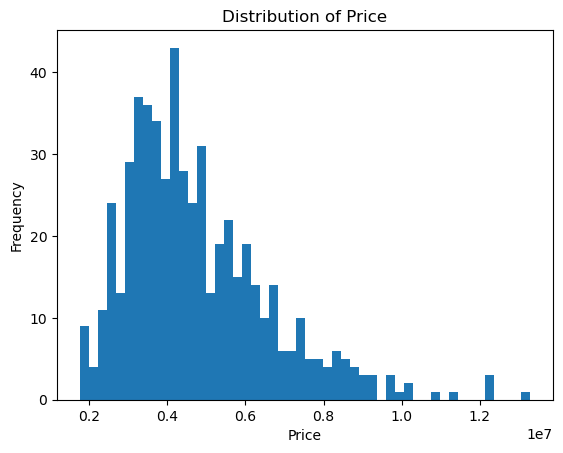

In [13]:
# Plot the distribution of the price column
plt.hist(df['price'], bins=50)

# Add a title to the plot
plt.title('Distribution of Price')

# Add labels to the x-axis and y-axis
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

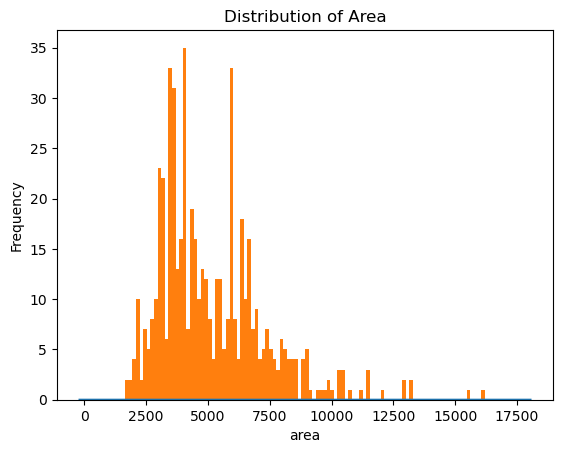

In [14]:
sns.distplot(df['area'], bins=100)
# Plot the distribution of the price column
plt.hist(df['area'], bins=100)

# Add a title to the plot
plt.title('Distribution of Area')

# Add labels to the x-axis and y-axis
plt.xlabel('area')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<Axes: xlabel='price', ylabel='area'>

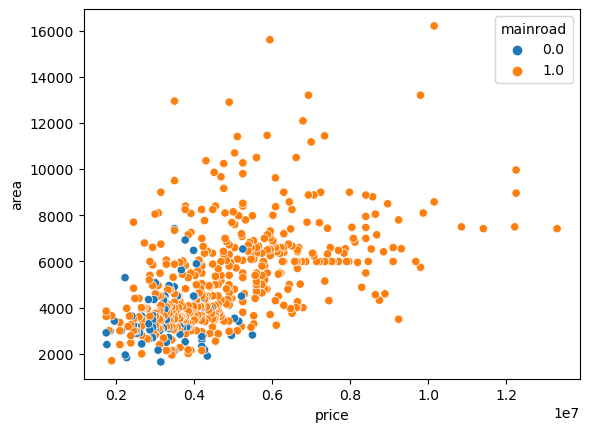

In [15]:
#Checking the data correlation between price, area, and how the nearest to the 
# main road affects
sns.scatterplot(x='price', y='area', hue='mainroad', data=df)


<Axes: xlabel='price', ylabel='area'>

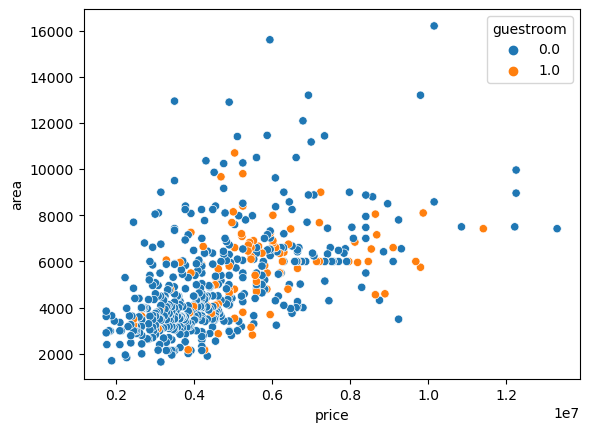

In [16]:
sns.scatterplot(x='price', y='area', hue='guestroom', data=df)

<Axes: xlabel='price', ylabel='area'>

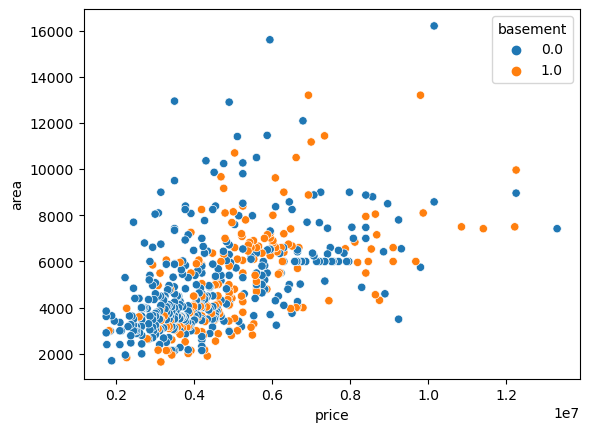

In [17]:
sns.scatterplot(x='price', y='area', hue='basement', data=df)

<Axes: xlabel='price', ylabel='area'>

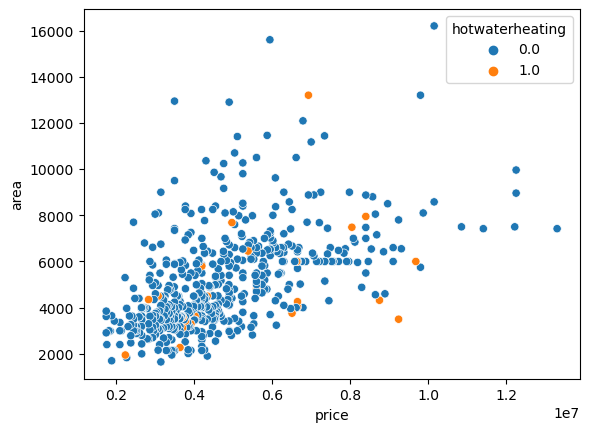

In [18]:
sns.scatterplot(x='price', y='area', hue='hotwaterheating', data=df)

<Axes: xlabel='price', ylabel='area'>

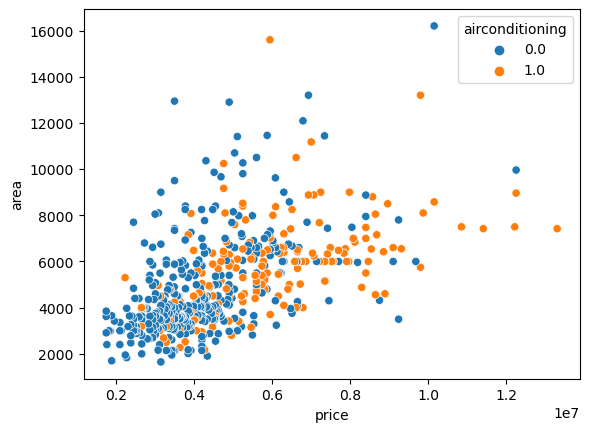

In [19]:
sns.scatterplot(x='price', y='area', hue='airconditioning', data=df)

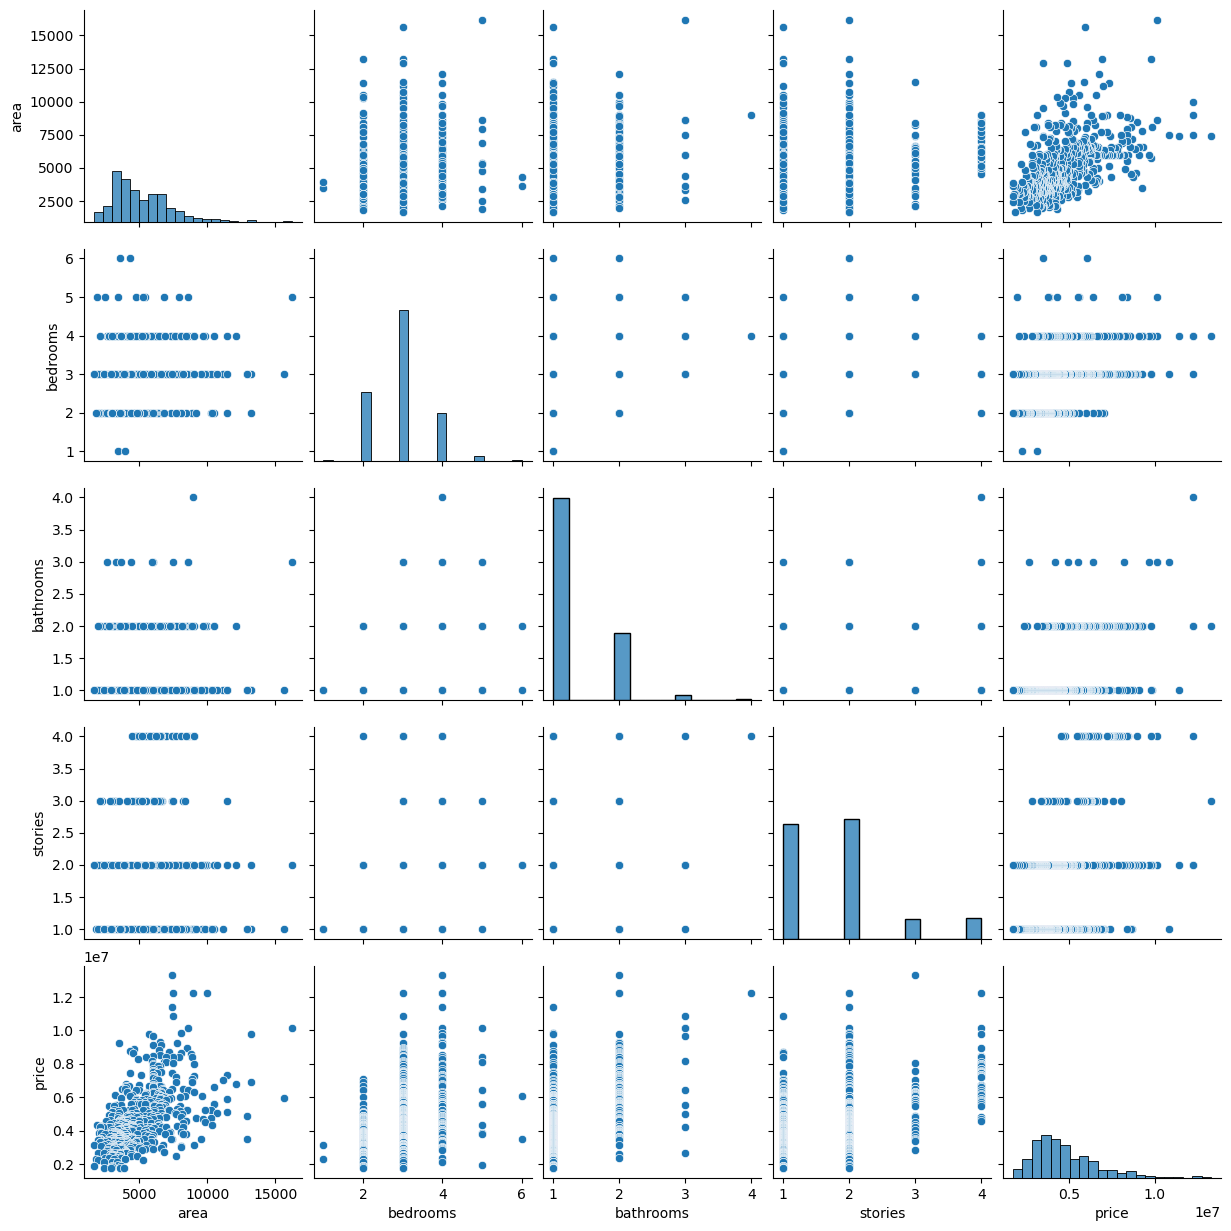

In [20]:
sns.pairplot(vars=['area','bedrooms','bathrooms','stories','price'],data=df)

<Axes: >

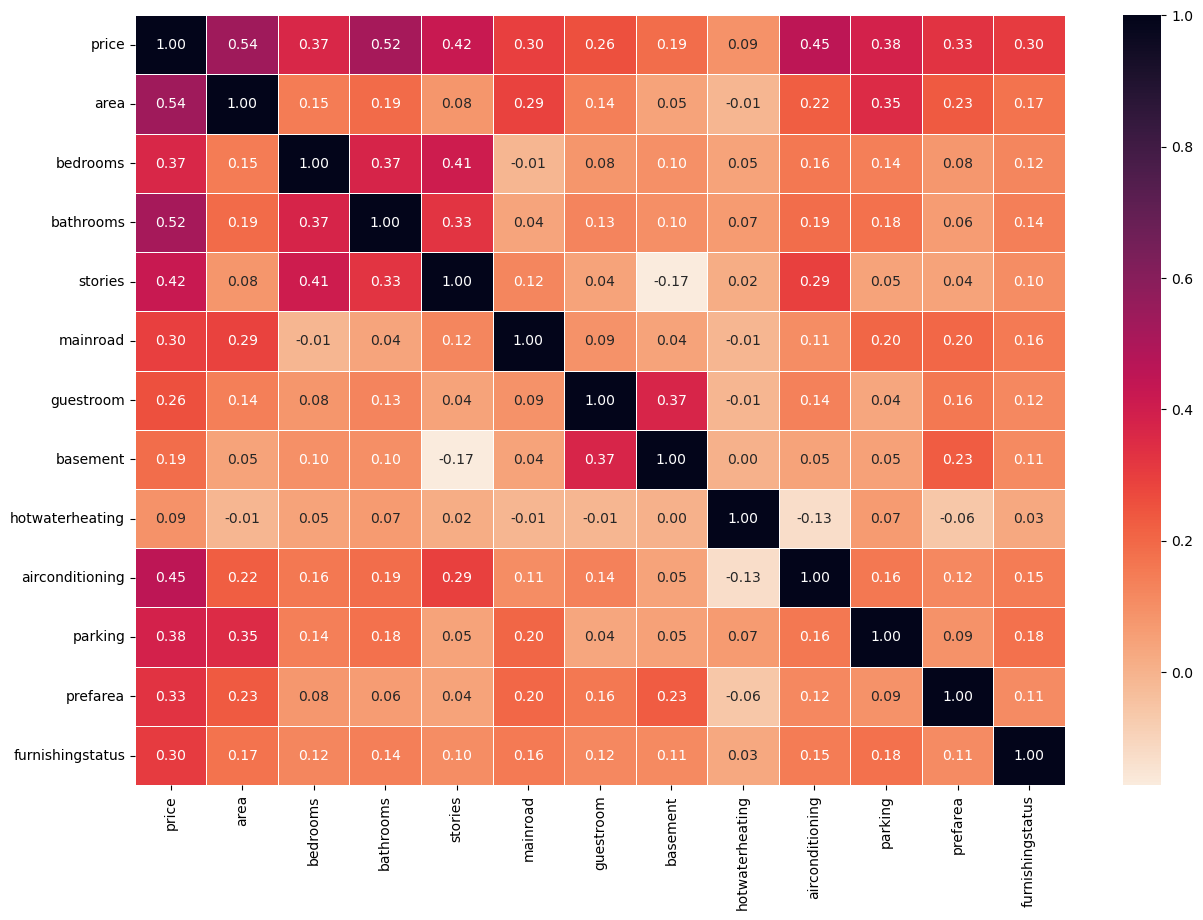

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

In [22]:
X=df.drop(['price'],axis=1)
y=df['price']

In [23]:
X.shape

(545, 12)

In [24]:
y.shape

(545,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)
#y_train=scalar.fit_transform(y_train.values.reshape(-1, 1))
#y_test=scalar.fit_transform(y_test.values.reshape(-1, 1))

In [27]:
X_train

array([[0.34123711, 0.6       , 0.33333333, ..., 0.33333333, 0.        ,
        0.5       ],
       [0.0361512 , 0.2       , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.44329897, 0.6       , 0.        , ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [0.15931271, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.16371134, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3024055 , 0.4       , 0.        , ..., 0.        , 1.        ,
        0.5       ]])

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model to the data
model.fit(X_train, y_train)

# Predict the target values for new data
predictions = model.predict(X_test)


In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
mean_squared_error(predictions,y_test)

1002026117659.112

In [31]:
k=r2_score(predictions,y_test)

In [32]:
k

0.5132035013176475

In [33]:
model.score(X_test,y_test)

0.6808245207417487

In [34]:
import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)